In [3]:
import sklearn.preprocessing as preprocess
import numpy as np
import pandas as pd
from keras import backend as K
import spacy
from spacy.lang.en import English
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 1000)
from tqdm import tqdm_notebook
from keras.layers import Conv1D, MaxPooling1D, Input
from keras.models import Model

Using TensorFlow backend.


In [4]:
df_hd_tp = pd.read_json('evaluation_set/deepnofakes/Evaluation_Final_50.json')
display(df_hd_tp.head(2))
df_hd_tp.keys()

,authors,evidence,headline,id,reason,sentences,type,urls
0,Bushord Washington,[https://www.snopes.com/fact-check/wikileaks-cofirms-hillary-clinton-sold-weapons-to-isis/],WIKILEAKS CLAIM: Hillary Gave Weapons To ISIS,0,Based on Snopes rating 'Mixture' which means 'a claim has significant elements of both truth and falsity to it such that it could not fairly be described by any other rating.',"[Hillary Clinton is being accused of knowingly allowing American weapons into the hands of ISIS terrorists., Assange claims that among the 1,700 emails just released, there is proof that – despite what she told Congress – she knew about the flow of weapons from Qatar to Libya and then to Syrian rebels and terrorists., So, for example, the disastrous, absolutely disastrous intervention in Libya, the destruction of the Gaddafi government, which led to the occupation of ISIS of large segments of that country, weapons flows going over to Syria, being pushed by Hillary Clinton, into jihadists within Syria, including ISIS, that’s there in those emails.]",1,http://thefederalistpapers.org/us/wikileaks-claim-hillary-gave-weapons-to-isis
1,Mike Adams,[https://www.snopes.com/fact-check/clinton-secret-earpiece-debate/],Hillary Clinton Wore Secret Earpiece During First Presidential Debate?,1,Based on Snopes rating 'False' which means 'the primary elements of a claim are demonstrably false.',"[""Now we learn that she was wearing a covert earpiece during last nights town hall debate with Trump."", The earpiece, clearly visible in the photo below, is a violation of debate rules, allowing Hillary to receive audio from another ""handler"" who tells her what to say., The obvious presence of this earpiece points to several huge revelations about Hillary Clinton and her failing campaign: 1) She is willing to lie, cheat and deceive to almost any degree in her bid for the White House.]",0,http://www.naturalnews.com/055233_ear_piece_Hillary_Clinton_presidential_debate.html


Index(['authors', 'evidence', 'headline', 'id', 'reason', 'sentences', 'type',
       'urls'],
      dtype='object')

In [70]:
def load_spacy():
    sentencizer = English()
    sentencizer.add_pipe(sentencizer.create_pipe('sentencizer'))
    nlp = spacy.load("en_core_web_md")
    return sentencizer, nlp
sentencizer, nlp = load_spacy()

In [80]:

def datagen(batchsize,dataframe):
    counter=0
    ar_ids=[]
    ar_sents=[]
    sent_vectors = []
    while True:
        idx=np.random.randint(dataframe.id.nunique())
        hd = df_hd_tp[dataframe.id==idx]['headline'].values[0]
        ar_id = df_hd_tp[dataframe.id==idx]['id'].values[0]
        cl = df_hd_tp[dataframe.id==idx]['sentences'].values[0]
        with open('evaluation_set/deepnofakes/cleaned/article_{0}.txt'.format(ar_id)) as f:
            article = f.readlines()
            
        article=''.join(article)
        # print(article)
        article = article.replace('[REF]','')
        doc = sentencizer(article)
        sentences = [sent.string.strip() for sent in doc.sents]
        print(len(sentences))
        sents = []
        for s in sentences:
            sents.append(nlp(s))
        
        ar_ids.append(ar_id)
        ar_sents.append(sents)
        counter+=1
        if counter==batchsize:
            yield np.array(ar_ids)
            ar_ids=[]
            counter=0
            

In [82]:
tdg = datagen(2,df_hd_tp)

In [83]:
next(tdg)

['An email released in the recent Wikileaks dump laid out Democrat presidential nominee Hillary Clinton’s real plan for the future — and it didn’t include justice, equality or fairness.', 'Instead, Clinton’s plan for the future revolved around maintaining political power while working to create an “unaware” and “compliant” citizenry.', 'The email came from Bill Ivey, who was appointed Chairman of the National Endowment for the Arts during President Bill Clinton’s second term.', 'It was sent to Hillary Clinton’s campaign chairman John Podesta on March 13, 2016.', 'In the email, Ivey considered how Clinton could fight against Trump’s appeal and suggested that simply falling back on previous policies wouldn’t work. “', 'And as I’ve mentioned, we’ve all been quite content to demean government, drop civics and in general conspire to produce an unaware and compliant citizenry,” he said.', 'Ivey admitted how the left has made secret plans to make the public oblivious to their devious plans, b

array([18, 33])

In [3]:
df_hd_tp[df_hd_tp.id==33].sentences.values[0]

['President Obama quickly papered over the fact that he gave Iran $400,000,000 to release hostages, but it appears that now Hillary Clinton may have given ISIS $400,000,000 accidently.',
 'The White House tried to frame the money sent as anything but a ransom.',
 'They instead claimed it was the “first installment of the $1.7 billion in the United States seized in 1979 after an arms deal with the Shah of Iran was halted following the Islamic revolution.” But everyone can assume that it was really a ransom.',
 'Well when asked about what Iran could potentially do with the money, the White House press secretary let slip that there could be a chance for them to use it for things other than aid.']

# All unique headlines

In [4]:
display(df_hd_tp[['id','headline']].sort_values(by='id'))

,id,headline
0,0,WIKILEAKS CLAIM: Hillary Gave Weapons To ISIS
1,1,Hillary Clinton Wore Secret Earpiece During First Presidential Debate?
2,2,President Obama Confirms He Will Refuse to Leave Office If Trump Is Elected
3,3,BREAKING: Fraudulent Clinton Votes Discovered By The “Tens Of Thousands”
4,4,"FBI director received millions from Clinton Foundation, his brother’s law firm does Clinton’s taxes"
5,5,Hillary Clinton Wore 'Secret Earpiece' During Commander-in-Chief Forum
6,6,Clinton Received Debate Questions Week Before Debate
7,7,Hillary Clinton Used Hand Signals to Rig Debate?
8,8,Hillary Clinton Cut Her Tax Bill by 'Donating' $1 Million to Herself via the Clinton Foundation?
9,9,Obama Declares His Family Will Move to Canada If Trump Is Elected


# Evaluation code

In [5]:
precisions=[]
recalls=[]
f1s=[]
best_N = 10
threshold = 0.95
for title in tqdm_notebook(df_hd_tp.headline.unique()):
    hd = df_hd_tp[df_hd_tp.headline==title]['headline'].values[0]
    ar_id = df_hd_tp[df_hd_tp.headline==title]['id'].values[0]
    cl = df_hd_tp[df_hd_tp.headline==title]['sentences'].values[0]
    if len(cl)<1: # since there are 3 to 5 claims
        continue
#     print('ar_id:',ar_id)
#     print('hd:',hd)
#     print('cl_1:',cl[0])
    with open('evaluation_set/deepnofakes/cleaned/article_{0}.txt'.format(ar_id)) as f:
        article = f.readlines()
    # sentences = article.split('\n')
    article=''.join(article)
    # print(article)
    article = article.replace('[REF]','')
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated
    doc = nlp(article)
    sentences = [sent.string.strip() for sent in doc.sents]
#     print(sentences)
#     print('sentences in article {0}:{1}'.format(ar_id,len(sentences)))
    
    
    
    
    nlp = spacy.load("en_core_web_md")
    tokens_hd = nlp(hd)
    sims = []
    for i in range(len(sentences)):
        tokens_s = nlp(sentences[i])
        sims.append(tokens_hd.similarity(tokens_s))
    
    top_N = []
    for idx in np.array(sims).argsort()[-best_N:][::-1]:
        top_N.append(sentences[idx])
#         print(sentences[idx],'sim:',np.around(sims[idx],4))
#         print('----')
        
    
    
    
    pred_counter = 0
    pred_similarity = []
    ground_truth_matching_sent = []
    pred_claim_sent = []
    
#     print('number of claims in ground truth:',len(cl))
    for i in range(len(top_N)):
    #     print('===========***********',i,'***********============')
        tN = nlp(top_N[i])
        pred_claim_sent.append(top_N[i])
    #     print(t5.vector)
        for j in range(len(cl)):
            _c = nlp(cl[j])
    #         print(_c.vector)
    #         print('top_5:',t5.text)
    #         print('-------------------')
    #         print('ground_truth:',_c.text)
    #         print('t5:{0}, cl:{1}, sim: {2}'.format(i,j,np.around(t5.similarity(_c),4)))
    #         print('===================================================================')
            if np.around(tN.similarity(_c),4) > threshold:
                ground_truth_matching_sent.append(cl[j])
                pred_similarity.append(np.around(tN.similarity(_c),4))
                pred_counter+=1
                break
        if pred_counter>=len(cl):
            break
        if len(ground_truth_matching_sent)!=len(pred_claim_sent):
            ground_truth_matching_sent.append('None')
            pred_similarity.append(0.0)
        

#     df = pd.DataFrame()
#     df['Headline'] = np.repeat(hd,len(top_N))
#     df['pred_claim_sent'] = pred_claim_sent
#     df['ground_truth_matching_sent'] = ground_truth_matching_sent
#     df['pred_similarity'] = pred_similarity
#     print(pred_counter)
#     display(df)
    p = pred_counter/best_N
    r = pred_counter/len(cl)
    f = 2*(pred_counter/best_N)*(pred_counter/len(cl))/(0.0001+(pred_counter/best_N)+(pred_counter/len(cl)))
    
    precisions.append(p)
    recalls.append(r)
    f1s.append(f)




# Results

In [6]:
df_results = pd.DataFrame()
df_results['precision @{0}'.format(best_N)] = precisions
df_results['recall @{0}'.format(best_N)] = recalls
df_results['f1 @{0}'.format(best_N)] = f1s
# print('Recall:{0}, Precision:{1}, F_1:{2}'.format(np.around(recall,4),np.around(precision,4),np.around(f1,4)))
df_results.describe()

,precision @10,recall @10,f1 @10
count,50.000000,50.000000,50.000000
mean,0.346000,0.964952,0.501766
std,0.105386,0.114503,0.103388
min,0.200000,0.400000,0.266622
25%,0.300000,1.000000,0.461503
50%,0.300000,1.000000,0.461503
75%,0.400000,1.000000,0.571388
max,0.900000,1.000000,0.947319


In [13]:
from sklearn.metrics import confusion_matrix
y_actu = [2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2]
y_pred = [0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2]


matrix2d = confusion_matrix(y_actu, y_pred) # some 2D matrix -- attention map

df_confusion=pd.DataFrame(matrix2d)
df_confusion.columns=['one','two','three'] # labels X axis
df_confusion.index = ['one','two','three'] # labels Y axis
df_confusion

,one,two,three
one,3,0,0
two,0,1,2
three,2,1,3


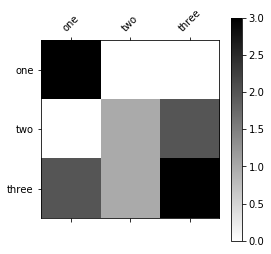

In [14]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [35]:
nlp = spacy.load("en_core_web_md")


In [65]:
tokens_hd = nlp('[my] hello how are you hello my car the a and A The THE give ref prob cum ')

In [66]:
for token in tokens_hd:
    print(token.text,token.rank)
    

[ 31
my 33
] 60
hello 6065
how 86
are 26
you 8
hello 6065
my 33
car 396
the 2
a 5
and 6
A 181
The 51
THE 713
give 218
ref 6109
prob 8516
cum 4723
